# Matrice de confusion

Attention pour utiliser la librairie `pandas_ml` il faut installer la version pandas==0.24.2. Vous pouvez à tout moment revenir sur la version récente avec la commande *pip install --upgrade pandas*

In [3]:
from pandas import read_csv
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [19]:
df = read_csv('prediction.csv',index_col=0)

In [20]:
df

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,MonthlyDebt,MonthlyBalance,DebtPerPerson,BalancePerPerson,NumberOfTime30-89DaysPastDueNotWorse,NumbersOfOpen-NumberRealEstate,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
field1,,,,,,,,,,,,,,,,,,,,,
4,5,0.907239,49,1,0.024926,63588,7,0,1,0,...,1584.975094,62003.024906,1584.975094,62003.024906,1,6,0,0.68154,0.74216,0.25784
19,20,0.602794,25,0,0.065868,333,2,0,0,0,...,21.934132,311.065868,21.934132,311.065868,0,2,0,0.91613,0.94185,0.05815
26,27,0.052436,58,0,0.097672,8333,22,0,1,0,...,813.902326,7519.097674,813.902326,7519.097674,0,21,0,0.97986,0.98575,0.01425
27,28,0.034421,69,0,0.042383,2500,17,0,0,0,...,105.957617,2394.042382,52.978809,1197.021191,0,17,0,0.98572,0.99117,0.00883
30,31,0.704074,28,1,0.155201,4200,8,0,0,0,...,651.844801,3548.155199,651.844801,3548.155199,1,8,0,0.84970,0.87285,0.12715
49,50,0.000080,70,0,0.256340,6900,21,1,1,0,...,1768.743661,5131.256339,1768.743661,5131.256339,0,20,0,0.80292,0.82951,0.17049
50,51,0.818978,73,0,3095.000000,0,9,0,1,1,...,0.000000,0.000000,0.000000,0.000000,1,8,0,0.81120,0.84428,0.15572
60,61,0.651603,58,0,0.241136,7783,11,0,1,0,...,1876.758865,5906.241135,1876.758865,5906.241135,0,10,0,0.93326,0.95664,0.04336
73,74,0.059669,31,0,3162.000000,0,11,0,2,0,...,0.000000,0.000000,0.000000,0.000000,0,9,0,0.96932,0.98005,0.01995


In [22]:
confusion_matrix = ConfusionMatrix(df['SeriousDlqin2yrs'], df['SeriousDlqin2yrs.1'])
confusion_matrix.print_stats()

population: 30000
P: 2015
N: 27985
PositiveTest: 603
NegativeTest: 29397
TP: 349
TN: 27731
FP: 254
FN: 1666
TPR: 0.17320099255583127
TNR: 0.990923709129891
PPV: 0.5787728026533997
NPV: 0.943327550430316
FPR: 0.009076290870108987
FDR: 0.42122719734660036
FNR: 0.8267990074441688
ACC: 0.936
F1_score: 0.2666157372039725
MCC: 0.2927277996704022
informedness: 0.16412470168572235
markedness: 0.5221003530837156
prevalence: 0.06716666666666667
LRP: 19.08279439635802
LRN: 0.8343720105053933
DOR: 22.87084676390241
FOR: 0.05667244956968398


In [28]:
confusion_matrix = ConfusionMatrix(df['SeriousDlqin2yrs'],df['SeriousDlqin2yrs.1'])

d = {'P\u0302': [confusion_matrix.TP, confusion_matrix.FP, confusion_matrix.PPV],
     'N\u0302': [confusion_matrix.FN, confusion_matrix.TN, confusion_matrix.NPV],
     'Recall': [confusion_matrix.TPR, confusion_matrix.TNR, confusion_matrix.ACC]}
confusion_matrix_df = pd.DataFrame(data=d,index=['P','N', 'Precision'])
confusion_matrix_df

,P̂,N̂,Recall
P,349.000000,1666.000000,0.173201
N,254.000000,27731.000000,0.990924
Precision,0.578773,0.943328,0.936000


Autre méthode :<br>
On commence d'abord par créer la colonne des erreurs (TN = True Negative, TP = True Positive, FN = False Negative, FP = False Positive).<br>
Pour cela on définit une boucle pour déterminer la valeur de chaque ligne :

In [23]:
def matrice(row):
    if row['SeriousDlqin2yrs'] == row['SeriousDlqin2yrs.1'] and row['SeriousDlqin2yrs'] == 0 :
        val = "TN"
    elif row['SeriousDlqin2yrs'] == row['SeriousDlqin2yrs.1'] and row['SeriousDlqin2yrs'] == 1 :
        val = "TP"
    elif row['SeriousDlqin2yrs'] > row['SeriousDlqin2yrs.1']:
        val = "FN"
    else:
        val = "FP"
    return val

On applique ensuite cette boucle sur chaque ligne avec la méthode 'apply':

In [24]:
df['Error'] = df.apply(matrice, axis=1)

On calcule ensuite le nombre de chaque catégorie :

In [35]:
matrix = df['Error'].value_counts()
print(matrix)

TN    27731
FN     1666
TP      349
FP      254
Name: Error, dtype: int64


Ceci nous renvoie un tableau. On peut le vérifier en entrant la commande suivante :

In [36]:
print("Le nombre de TN est de", matrix[0])

Le nombre de TN est de 27731


Enfin pour avoir la matrice des coûts, on doit appliquer la formule suivante : <br>
resultat = (nombre de TN * coût des TN)+(nombre de FN * coût des FN)+ (nombre de TP * coût des TP) + (nombre de FP * coût des FP)

Ici, les coûts sont de :

    TN :500$, FN :-500$, TP :0$ , FP :-2500$

In [38]:
resultat = (matrix[0]*500)+(matrix[1]*(-500))+(matrix[2]*0)+(matrix[3]*(-2500))
print("resultat =", resultat)

resultat = 12397500


### La Précision (Accuracy)

Pour l'accuracy, on utilise la formule suivante :<br>
accuracy = (nombre de TP + nombre de TN)/(nombre de TN + nombre de FN + nombre de TP + nombre de FP)

In [39]:
accuracy=(matrix[2]+matrix[0])/(matrix[0]+matrix[1]+matrix[2]+matrix[3])
print("L'accuracy est de",accuracy)

L'accuracy est de 0.936


### Analyse des 100 plus grosses erreurs

In [40]:
df['errMAJ'] = (abs(df['1 probability'] - df['SeriousDlqin2yrs']))
# différence entre la prédiction et la vraie valeur (en valeur absolue)

df.sort_values(by='errMAJ', ascending=False).head(100)
#on trie par le niveau d'erreur et on sélectionne les 100 plus grosses erreurs
df.to_csv('errmaj.csv')

### Seuil optimal

In [30]:
def cost_threshold(threshold):
    prediction_threshold = df['1 probability'] > threshold

    #~ = "not" pour les tableaux / & = "and" pour les tableaux / | = "or" pour les tableaux

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (df['SeriousDlqin2yrs'] == 1)
    N_real = (df['SeriousDlqin2yrs'] == 0)

    TP = len(df.loc[P_pred & P_real])
    TN = len(df.loc[N_pred & N_real])
    FP = len(df.loc[P_pred & N_real])
    FN = len(df.loc[N_pred & P_real])
    
    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost

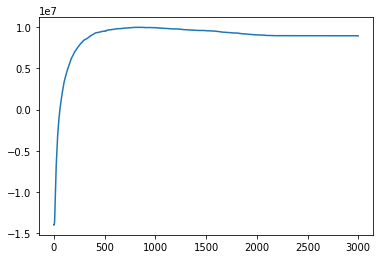

In [31]:
table = [cost_threshold(n/3000) for n in range(0,3000)]
plt.plot(table)

In [13]:
max_val = max(table)
max_threshold = table.index(max_val)/3000
print(f'Le gain maximum est {max_val} et il est obtenu avec un seuil de {max_threshold}')

Le gain maximum est 10012500 et il est obtenu avec un seuil de 0.2826666666666667


### Calcul AUC

In [43]:
is_positive = (df['SeriousDlqin2yrs'] == 1)
is_negative = (df['SeriousDlqin2yrs'] == 0)
positives = df[is_positive]
negatives = df[is_negative]

nb_positive=confusion_matrix.P
nb_negative=confusion_matrix.N

In [44]:
is_positive = (df['SeriousDlqin2yrs'] == 1)
df_threshold=pd.DataFrame(index=df['1 probability'])
df_threshold['positive'] = is_positive.values
df_threshold.sort_index(inplace=True, ascending=False)

df_threshold['positive_sum'] =  df_threshold['positive'].cumsum()
auc=df_threshold.loc[~df_threshold['positive']]['positive_sum'].sum()/(nb_positive*nb_negative)

In [45]:
print(auc)

0.8555802182221866


### Courbe ROC

In [24]:
threshold_list = df.sort_values(by='1 probability',ascending=False)['SeriousDlqin2yrs'].values
tpr = []
fpr = []

positive_sum = 0
negative_sum = 0
for i in range(len(threshold_list)):
    if threshold_list[i] == 1:
        positive_sum += 1
    else:
        negative_sum += 1
    tpr.append(positive_sum/nb_positive)
    fpr.append(negative_sum/nb_negative)

In [36]:
df.sort_values(by='1 probability',ascending=False)['SeriousDlqin2yrs'].values

array([1, 1, 1, ..., 0, 0, 0])

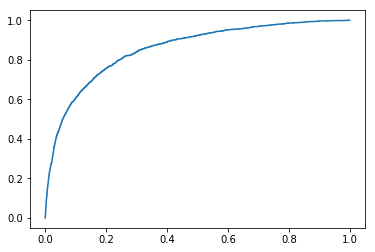

In [37]:
plt.plot(fpr,tpr)
plt.show()